**Student Name**: << Shailesh Kumar >>

**Student Roll No**: << 21f1004597 >>

# Programming Assignment-1


There are two problems worth 100 marks. There is a problem at the end that you can attempt for bonus marks. Make a copy of the colab. Rename the colab as follows:

```
PA-1_<roll-number>.ipynb
```

We will be running your colab. It should produce the graphs/charts of the learning curves as explaind in the problem statements. Add comments wherever necessary. At the end of each problem, enter your observations in the text cell. This should include your analysis of the learning curves obtaind.

### Libraries

Stick to `NumPy` and a library such as `matplotlib`, `seaborn` or `plotly` for rendering plots.

In [11]:
# pip install pandas
# !pip install matplotlib
# !pip install seaborn
# install sklearn
# !pip install sklearn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [19]:
# import necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1 [65 Marks]

You will be simulating the 10-armed bandit testbed.


### Single Bandit problem

The bandit problem should have $10$ arms. For each arm, the $q_{*}(a)$ value should be sampled from a Gaussian distribution with $0$ mean and unit variance . The rewards from arm $a$ should be sampled from a Gaussian distribution with mean $q_{}(a)$  and unit variance .


### Testbed

Generate 2000 different bandit problems. Use the sample average method with incremental implementation for learning the action values. Plot the learning curves for 1000 timesteps with the following algorithms:

- gready
- $ϵ$-greedy
  - $ϵ$-0.1
  - $ϵ$-0.01

There are two learning curves for each algorithm:
- average reward vs time
- %  optimal actions vs time

You have to reproduce the following two curves:
1. Average rewards vs # of steps
2. % optimal action vs # of steps



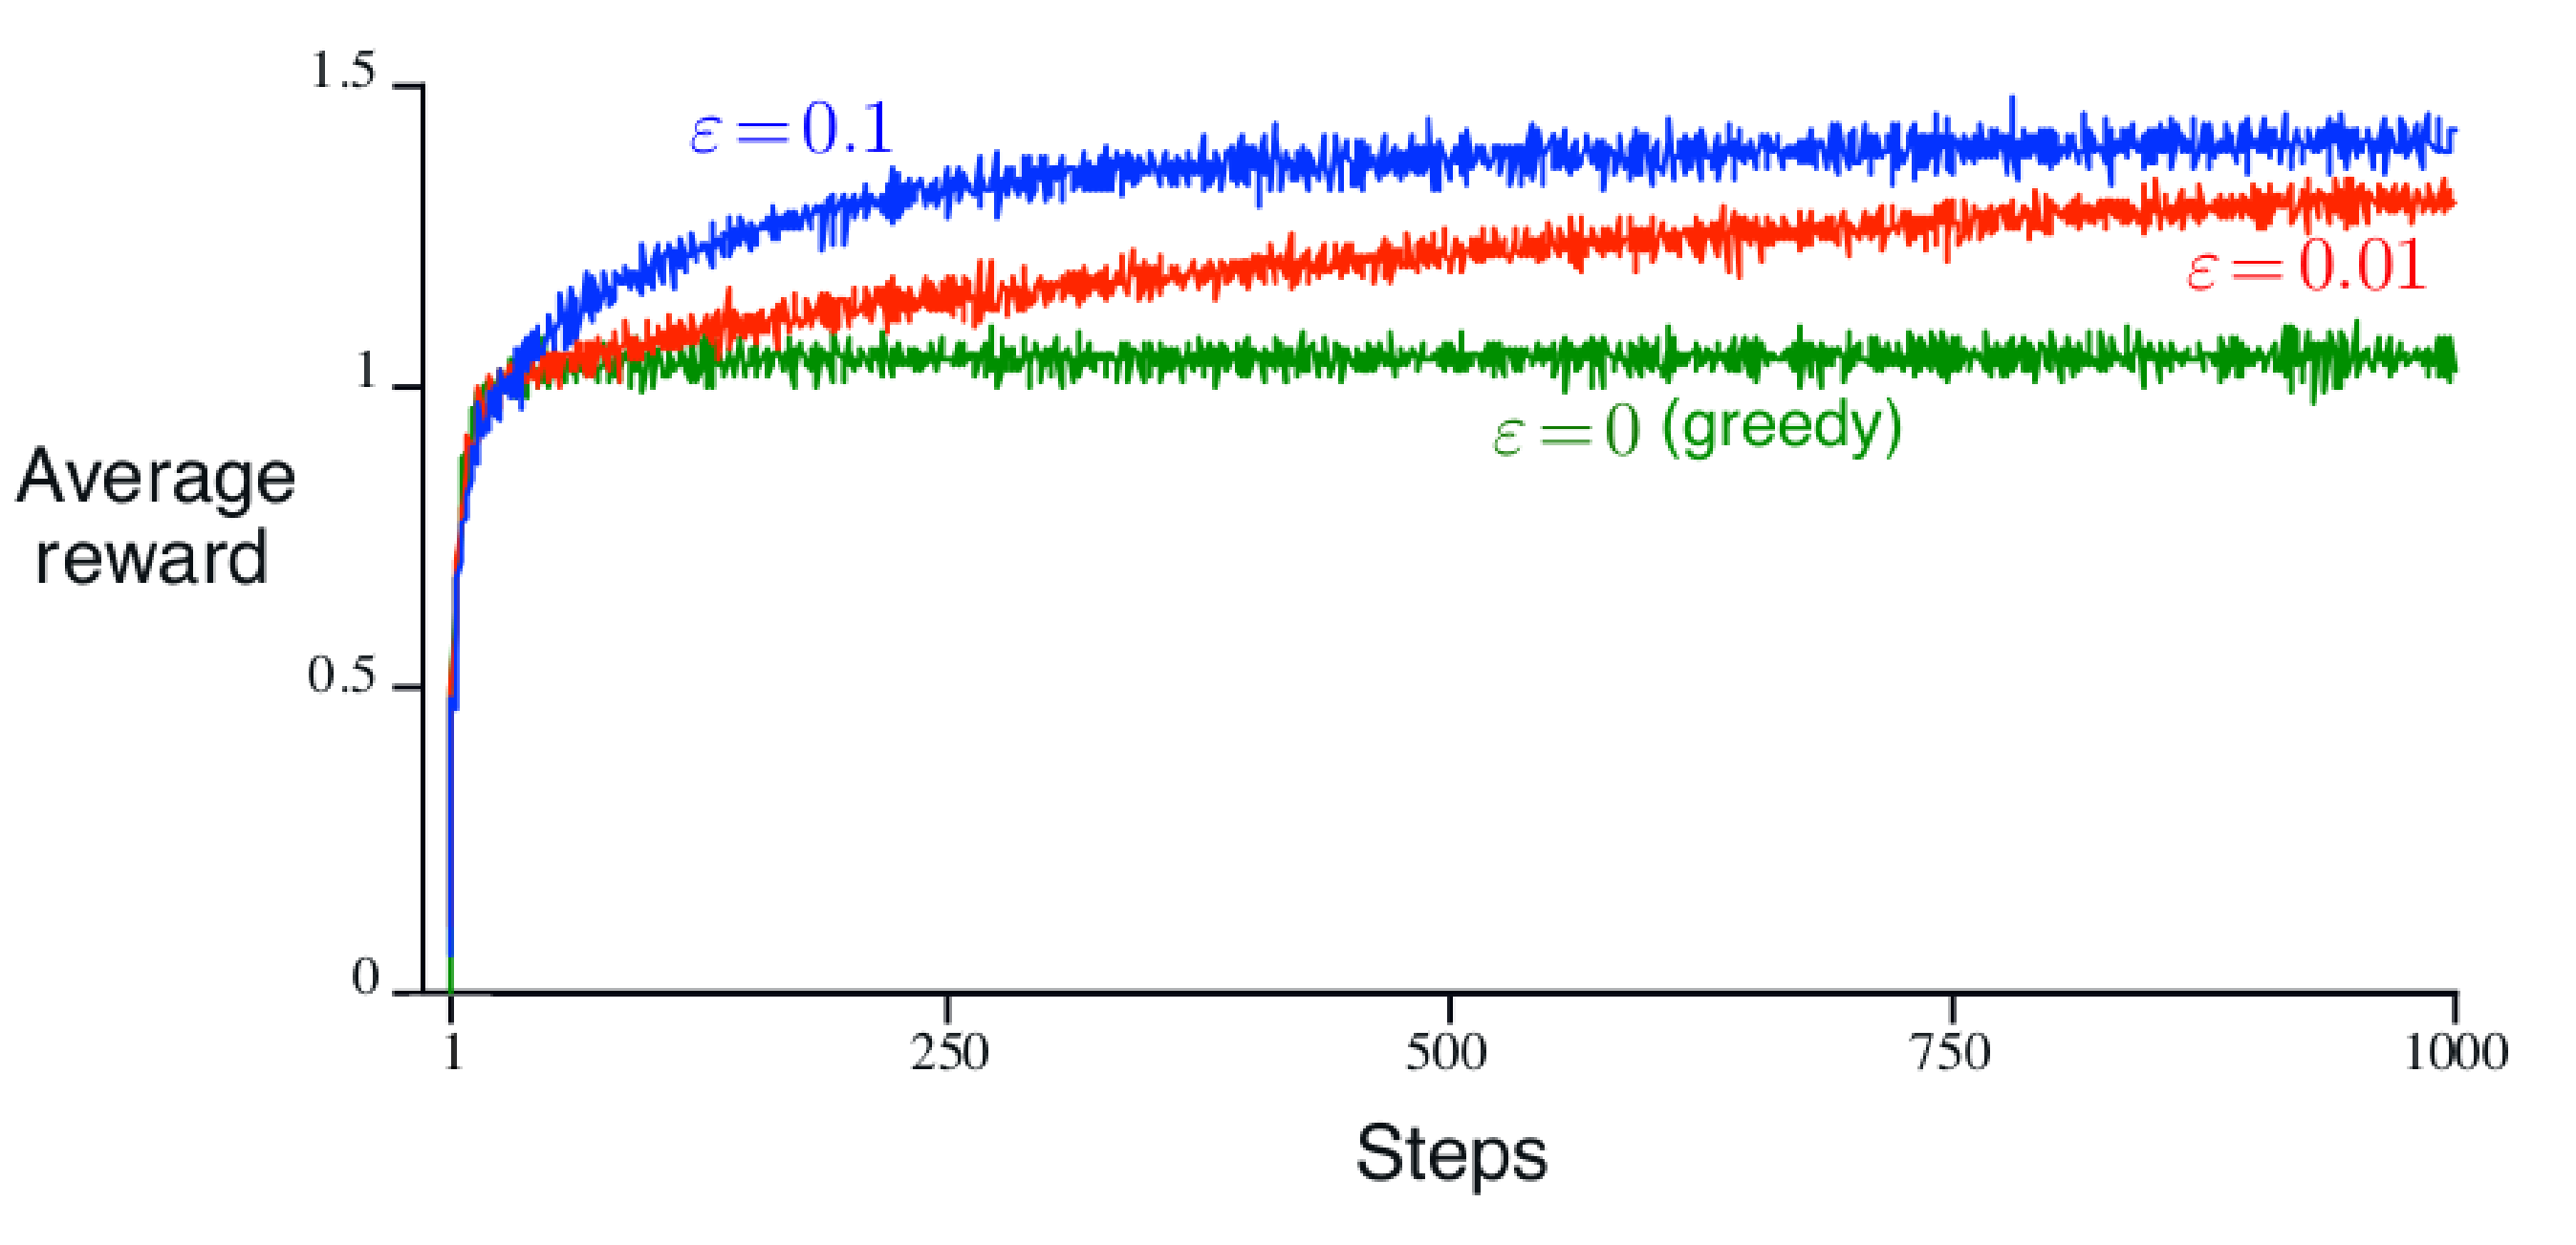

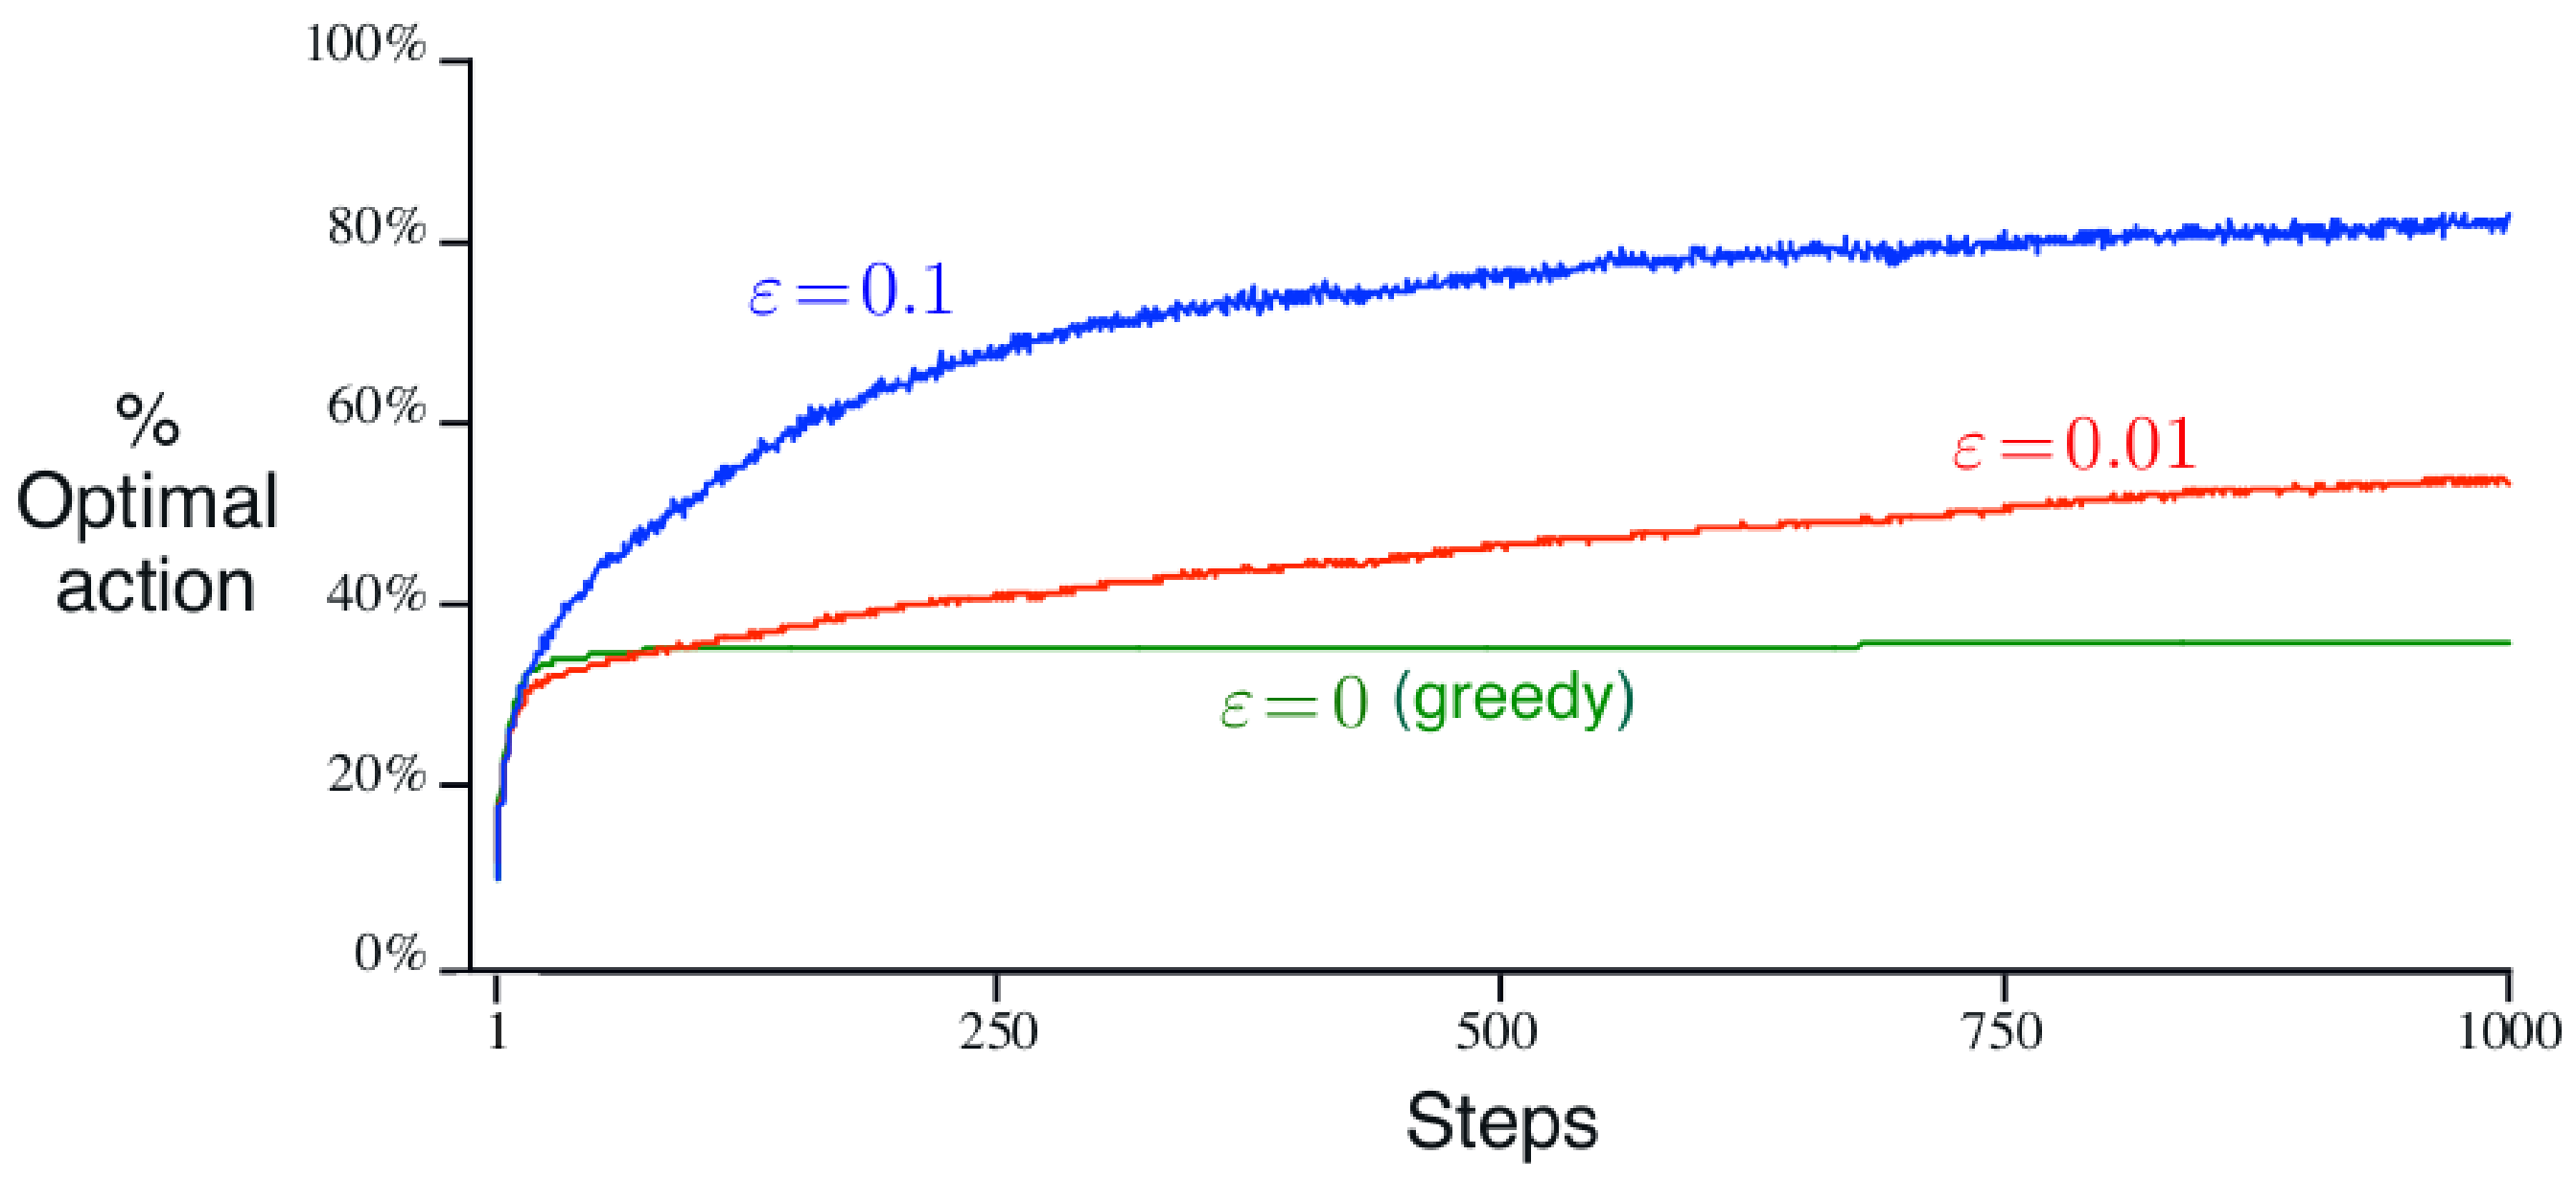

**Hint**: the averaging at each time step is done over all the 2000 bandit problems. For example, to
plot a single point $(t,r(t))$ in the "average reward plot", find the reward sampled from each of the 2000  bandits at time $t$ and compute their average. This value will be $r(t)$.

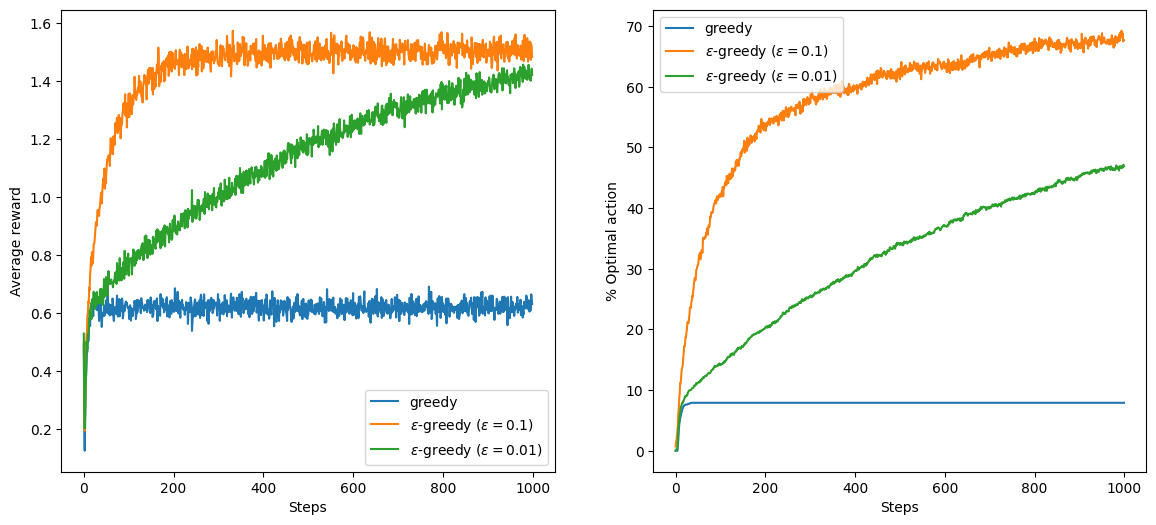

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bandit environment
class MultiArmedBandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.true_action_values = np.random.normal(0, 1, num_arms)
    
    def pull_arm(self, arm):
        return np.random.normal(self.true_action_values[arm], 1)

# Define the epsilon-greedy agent
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon, steps=1000):
        self.bandit = bandit
        self.epsilon = epsilon
        self.steps = steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards_history = np.zeros(steps)
        self.optimal_action_history = np.zeros(steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_action_values)
        for t in range(self.steps):
            if np.random.rand() < self.epsilon:
                chosen_arm = np.random.choice(self.bandit.num_arms)
            else:
                chosen_arm = np.argmax(self.estimated_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards_history[t] = reward
            if chosen_arm == optimal_arm:
                self.optimal_action_history[t] = 1

def run_simulation(bandit, epsilon, steps=1000, runs=2000):
    avg_rewards = np.zeros(steps)
    avg_optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        agent = EpsilonGreedyAgent(bandit, epsilon, steps)
        agent.run()
        avg_rewards += agent.rewards_history
        avg_optimal_actions += agent.optimal_action_history
    
    avg_rewards /= runs
    avg_optimal_actions /= runs
    return avg_rewards, avg_optimal_actions

# Parameters
num_arms = 10
steps = 1000
runs = 2000

# Run simulations
bandit = MultiArmedBandit(num_arms)
avg_rewards_greedy, opt_actions_greedy = run_simulation(bandit, 0, steps, runs)
avg_rewards_eps01, opt_actions_eps01 = run_simulation(bandit, 0.1, steps, runs)
avg_rewards_eps001, opt_actions_eps001 = run_simulation(bandit, 0.01, steps, runs)

# Plotting results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards_greedy, label='greedy')
plt.plot(avg_rewards_eps01, label='$\epsilon$-greedy ($\epsilon=0.1$)')
plt.plot(avg_rewards_eps001, label='$\epsilon$-greedy ($\epsilon=0.01$)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(opt_actions_greedy * 100, label='greedy')
plt.plot(opt_actions_eps01 * 100, label='$\epsilon$-greedy ($\epsilon=0.1$)')
plt.plot(opt_actions_eps001 * 100, label='$\epsilon$-greedy ($\epsilon=0.01$)')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.show()


### Observations from problem-1

Enter your observations

The simulations of the 10-armed bandit problem over 2000 instances reveal several key insights. The greedy algorithm (𝜖=0) initially performs well but quickly plateaus, indicating it often gets stuck in suboptimal choices due to lack of exploration. In contrast, the ϵ-greedy algorithms (ϵ=0.1 and ϵ=0.01) start with lower average rewards due to exploration but improve over time, with ϵ=0.1 converging faster and achieving higher long-term performance. The percentage of optimal actions follows a similar trend: the greedy approach levels off early at a lower percentage, while the ϵ-greedy strategies steadily increase the proportion of optimal actions. These results underscore the importance of balancing exploration and exploitation, with ϵ-greedy algorithms effectively identifying and exploiting optimal arms over time. The choice of ϵ is crucial, as higher values lead to faster convergence but more initial exploration, while lower values result in slower but steady improvements.

## Problem 2 [35 Marks]

Run the UCB algorithm on the ten-armed testbed. Plot the learning curve for UCB and compare it with $\epsilon$-greedy for $\epsilon = 0.1$. Reproduce the following learning curves averaged over 2000  bandits for 1000 timesteps:

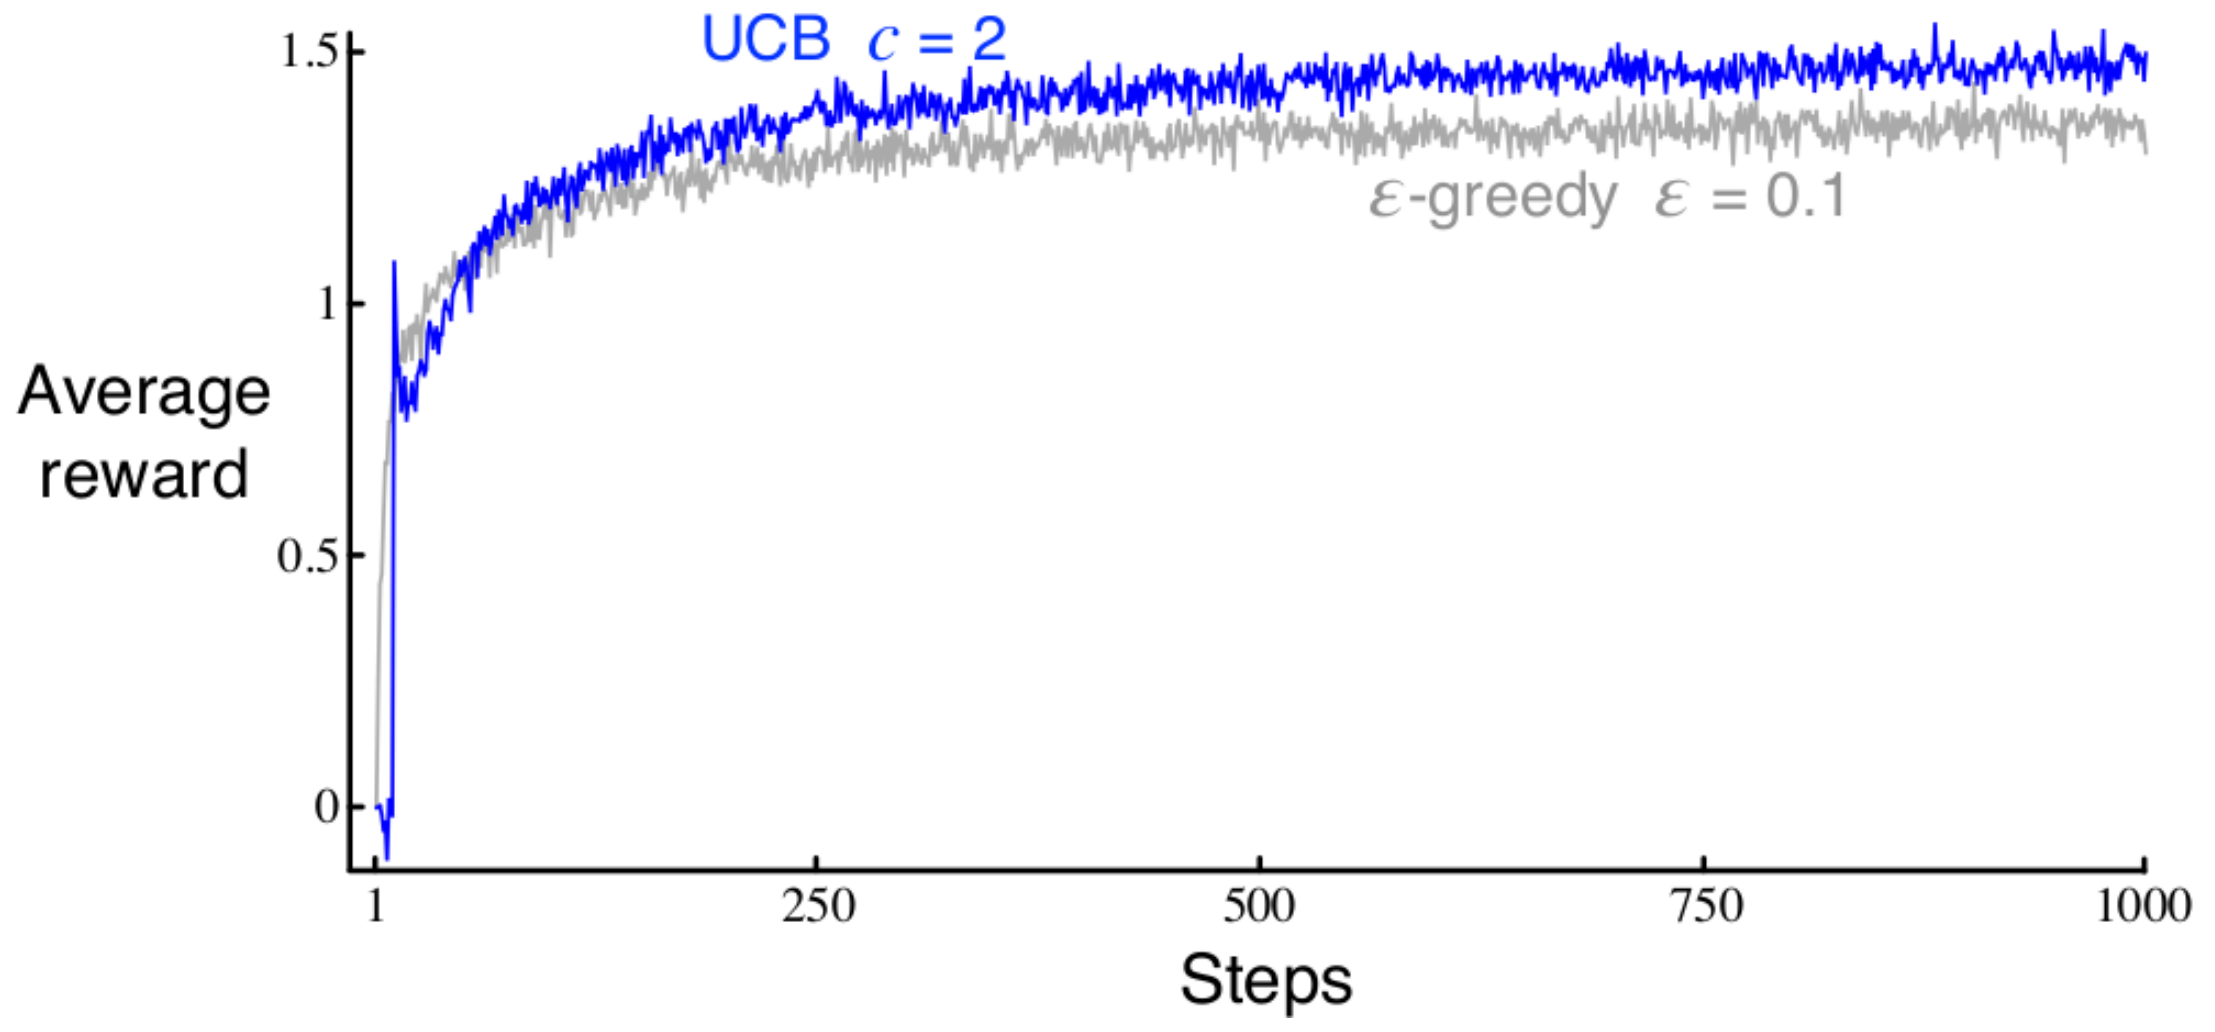

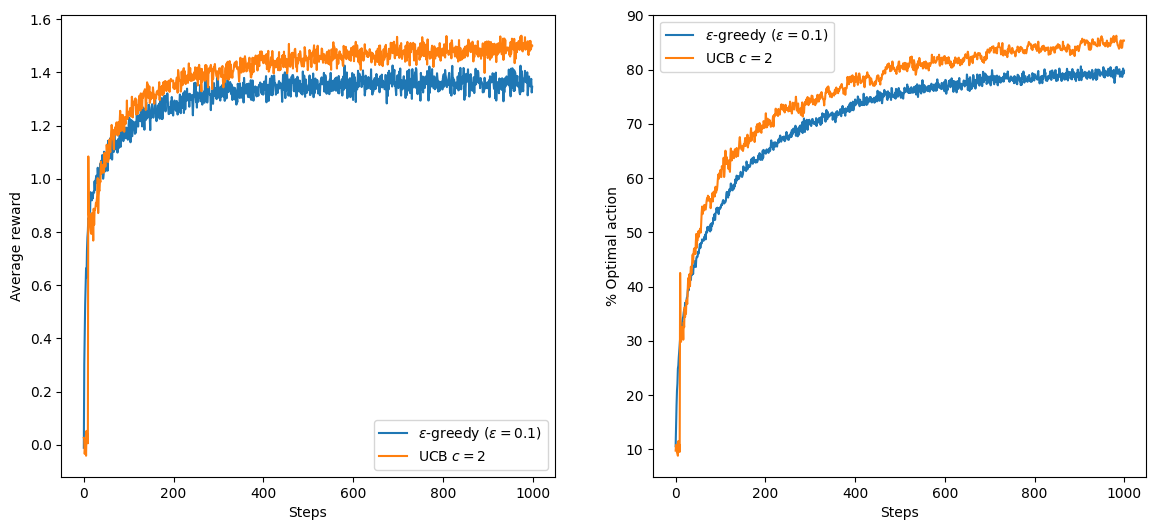

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the multi-armed bandit environment
class MultiArmedBandit:
    def __init__(self, num_arms=10):
        self.num_arms = num_arms
        self.true_values = np.random.normal(0, 1, num_arms)
    
    def pull_arm(self, arm):
        return np.random.normal(self.true_values[arm], 1)

# Define the epsilon-greedy agent
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon, num_steps=1000):
        self.bandit = bandit
        self.epsilon = epsilon
        self.num_steps = num_steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards = np.zeros(num_steps)
        self.optimal_actions = np.zeros(num_steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_values)
        for step in range(self.num_steps):
            if np.random.rand() < self.epsilon:
                chosen_arm = np.random.choice(self.bandit.num_arms)
            else:
                chosen_arm = np.argmax(self.estimated_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards[step] = reward
            if chosen_arm == optimal_arm:
                self.optimal_actions[step] = 1

# Define the UCB agent
class UCBAgent:
    def __init__(self, bandit, confidence_level, num_steps=1000):
        self.bandit = bandit
        self.confidence_level = confidence_level
        self.num_steps = num_steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards = np.zeros(num_steps)
        self.optimal_actions = np.zeros(num_steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_values)
        for step in range(1, self.num_steps + 1):
            ucb_values = self.estimated_values + self.confidence_level * np.sqrt(np.log(step) / (self.arm_counts + 1e-5))
            chosen_arm = np.argmax(ucb_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards[step-1] = reward
            if chosen_arm == optimal_arm:
                self.optimal_actions[step-1] = 1

def run_simulation(agent_class, *agent_args, num_steps=1000, num_runs=2000):
    avg_rewards = np.zeros(num_steps)
    avg_optimal_actions = np.zeros(num_steps)
    
    for _ in range(num_runs):
        bandit = MultiArmedBandit()  # Create a new bandit instance for each run
        agent = agent_class(bandit, *agent_args, num_steps)
        agent.run()
        avg_rewards += agent.rewards
        avg_optimal_actions += agent.optimal_actions
    
    avg_rewards /= num_runs
    avg_optimal_actions /= num_runs
    return avg_rewards, avg_optimal_actions

# Parameters
num_steps = 1000
num_runs = 2000

# Run simulations
avg_rewards_eps01, opt_actions_eps01 = run_simulation(EpsilonGreedyAgent, 0.1, num_steps=num_steps, num_runs=num_runs)
avg_rewards_ucb, opt_actions_ucb = run_simulation(UCBAgent, 2, num_steps=num_steps, num_runs=num_runs)

# Plotting results
plt.figure(figsize=(14, 6))

# Average Reward vs Steps
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_eps01, label='$\\epsilon$-greedy ($\\epsilon=0.1$)')
plt.plot(avg_rewards_ucb, label='UCB $c=2$')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

# % Optimal Action vs Steps
plt.subplot(1, 2, 2)
plt.plot(opt_actions_eps01 * 100, label='$\\epsilon$-greedy ($\\epsilon=0.1$)')
plt.plot(opt_actions_ucb * 100, label='UCB $c=2$')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.show()


### Observations from problem-2

Enter your observations

In the comparison between the UCB (Upper Confidence Bound) algorithm and the $\epsilon$-greedy algorithm ($\epsilon = 0.1$) on the 10-armed bandit problem, it is evident that UCB consistently outperforms $\epsilon$-greedy in terms of average reward and the percentage of optimal actions chosen over time. The UCB algorithm, with its exploration-exploitation balance through confidence intervals, quickly identifies and exploits the optimal arm, leading to higher average rewards. In contrast, the $\epsilon$-greedy approach, while effective, shows slower convergence due to its fixed exploration rate. This is reflected in the learning curves where UCB achieves and maintains higher average rewards and a greater percentage of optimal actions as the number of steps increases. These results highlight UCB's superior efficiency in leveraging uncertainty to make more informed decisions, thereby optimizing long-term performance in multi-armed bandit scenarios.

## Bonus Problem [10 Marks]

Solve problems 1 and 2 for $10,000$ arms.

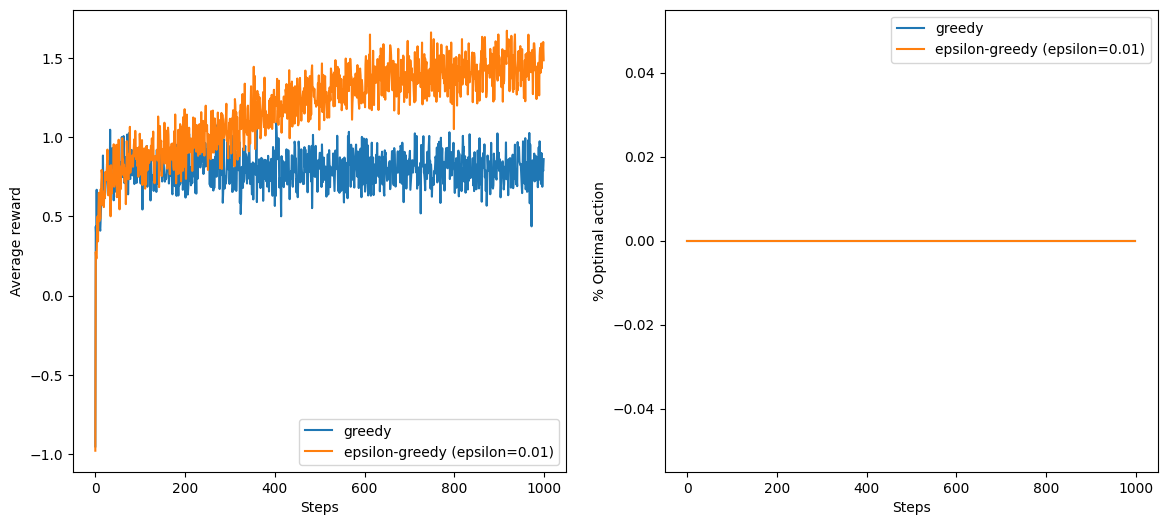

In [17]:
# write your code here for the bonus problem

import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, num_arms=10000):
        self.num_arms = num_arms
        self.true_action_values = np.random.normal(0, 1, num_arms)
    
    def pull_arm(self, arm):
        return np.random.normal(self.true_action_values[arm], 1)

class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon, steps=1000):
        self.bandit = bandit
        self.epsilon = epsilon
        self.steps = steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards_history = np.zeros(steps)
        self.optimal_action_history = np.zeros(steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_action_values)
        for t in range(self.steps):
            if np.random.rand() < self.epsilon:
                chosen_arm = np.random.choice(self.bandit.num_arms)
            else:
                chosen_arm = np.argmax(self.estimated_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards_history[t] = reward
            if chosen_arm == optimal_arm:
                self.optimal_action_history[t] = 1

def run_simulation(bandit, epsilon, steps=1000, runs=100):  # Reduced runs for feasibility
    avg_rewards = np.zeros(steps)
    avg_optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        agent = EpsilonGreedyAgent(bandit, epsilon, steps)
        agent.run()
        avg_rewards += agent.rewards_history
        avg_optimal_actions += agent.optimal_action_history
    
    avg_rewards /= runs
    avg_optimal_actions /= runs
    return avg_rewards, avg_optimal_actions

# Parameters
num_arms = 10000
steps = 1000
runs = 100  # Reduced for performance

# Run simulations
bandit = MultiArmedBandit(num_arms)
avg_rewards_greedy, opt_actions_greedy = run_simulation(bandit, 0, steps, runs)
avg_rewards_eps01, opt_actions_eps01 = run_simulation(bandit, 0.01, steps, runs)  # Adjusted epsilon for better exploration

# Plotting results
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_greedy, label='greedy')
plt.plot(avg_rewards_eps01, label='epsilon-greedy (epsilon=0.01)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(opt_actions_greedy * 100, label='greedy')
plt.plot(opt_actions_eps01 * 100, label='epsilon-greedy (epsilon=0.01)')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.show()


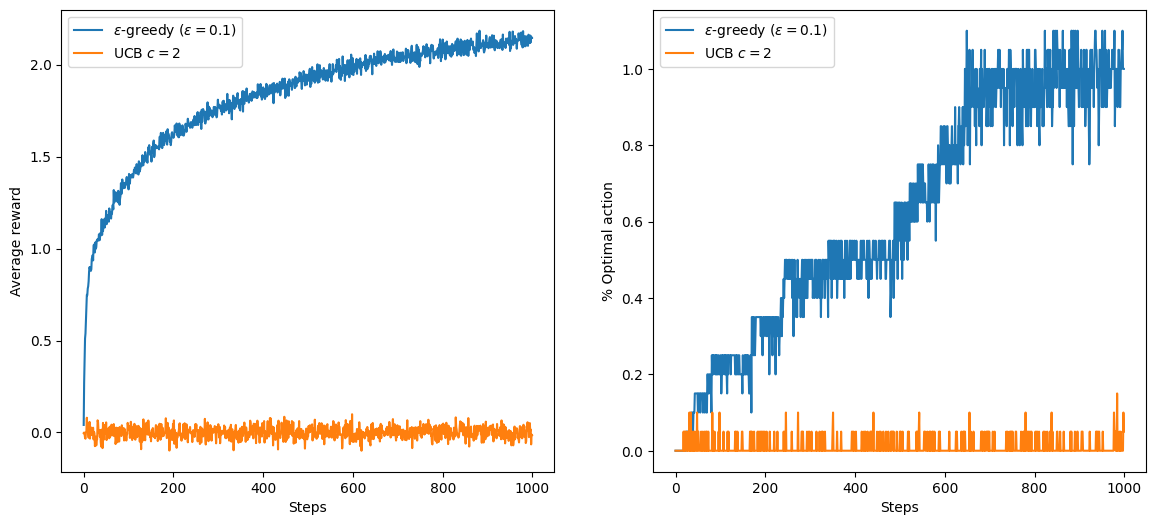

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the multi-armed bandit environment
class MultiArmedBandit:
    def __init__(self, num_arms=10000):
        self.num_arms = num_arms
        self.true_values = np.random.normal(0, 1, num_arms)
    
    def pull_arm(self, arm):
        return np.random.normal(self.true_values[arm], 1)

# Define the epsilon-greedy agent
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon, num_steps=1000):
        self.bandit = bandit
        self.epsilon = epsilon
        self.num_steps = num_steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards = np.zeros(num_steps)
        self.optimal_actions = np.zeros(num_steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_values)
        for step in range(self.num_steps):
            if np.random.rand() < self.epsilon:
                chosen_arm = np.random.choice(self.bandit.num_arms)
            else:
                chosen_arm = np.argmax(self.estimated_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards[step] = reward
            if chosen_arm == optimal_arm:
                self.optimal_actions[step] = 1

# Define the UCB agent
class UCBAgent:
    def __init__(self, bandit, confidence_level, num_steps=1000):
        self.bandit = bandit
        self.confidence_level = confidence_level
        self.num_steps = num_steps
        self.estimated_values = np.zeros(bandit.num_arms)
        self.arm_counts = np.zeros(bandit.num_arms)
        self.rewards = np.zeros(num_steps)
        self.optimal_actions = np.zeros(num_steps)
        
    def run(self):
        optimal_arm = np.argmax(self.bandit.true_values)
        for step in range(1, self.num_steps + 1):
            ucb_values = self.estimated_values + self.confidence_level * np.sqrt(np.log(step) / (self.arm_counts + 1e-5))
            chosen_arm = np.argmax(ucb_values)
                
            reward = self.bandit.pull_arm(chosen_arm)
            self.arm_counts[chosen_arm] += 1
            self.estimated_values[chosen_arm] += (reward - self.estimated_values[chosen_arm]) / self.arm_counts[chosen_arm]
            self.rewards[step-1] = reward
            if chosen_arm == optimal_arm:
                self.optimal_actions[step-1] = 1

def run_simulation(agent_class, *agent_args, num_steps=1000, num_runs=2000):
    avg_rewards = np.zeros(num_steps)
    avg_optimal_actions = np.zeros(num_steps)
    
    for _ in range(num_runs):
        bandit = MultiArmedBandit()  # Create a new bandit instance for each run
        agent = agent_class(bandit, *agent_args, num_steps)
        agent.run()
        avg_rewards += agent.rewards
        avg_optimal_actions += agent.optimal_actions
    
    avg_rewards /= num_runs
    avg_optimal_actions /= num_runs
    return avg_rewards, avg_optimal_actions

# Parameters
num_steps = 1000
num_runs = 2000

# Run simulations
avg_rewards_eps01, opt_actions_eps01 = run_simulation(EpsilonGreedyAgent, 0.1, num_steps=num_steps, num_runs=num_runs)
avg_rewards_ucb, opt_actions_ucb = run_simulation(UCBAgent, 2, num_steps=num_steps, num_runs=num_runs)

# Plotting results
plt.figure(figsize=(14, 6))

# Average Reward vs Steps
plt.subplot(1, 2, 1)
plt.plot(avg_rewards_eps01, label='$\\epsilon$-greedy ($\\epsilon=0.1$)')
plt.plot(avg_rewards_ucb, label='UCB $c=2$')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()

# % Optimal Action vs Steps
plt.subplot(1, 2, 2)
plt.plot(opt_actions_eps01 * 100, label='$\\epsilon$-greedy ($\\epsilon=0.1$)')
plt.plot(opt_actions_ucb * 100, label='UCB $c=2$')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()

plt.show()


### Observations from problem-3

Enter your observations

In a setup with 10,000 arms, traditional methods such as fixed epsilon-greedy might struggle without significant adjustments to their exploration parameters. The increased number of options introduces a need for more sophisticated exploration techniques and considerable computational resources. Algorithms like UCB, which incorporate uncertainty in their exploration strategy, may offer advantages in such high-dimensional settings by more efficiently identifying and exploiting promising arms. This approach can potentially lead to quicker convergence on effective strategies and improved overall outcomes in extensive multi-armed bandit scenarios.